# With Rule-Based Classification Customer Yield Calculation

BUSINESS PROBLEM

A game company using some features of its customers
level-based new customer definitions (persona)
create and segment according to these new customer definitions.
to create new customers according to these segments.
estimating how much the company can earn on average
wants.

For example:
It is requested to determine how much income a 25-year-old male user from Turkey, who is an IOS user, will bring on average.

DATASET STORY

Persona.csv dataset includes prices of products sold by an international game company and
contains some demographic information of users who purchase products. Data
set consists of records created in each sale transaction. This means
The table is not deduplicated. In other words, a person with certain demographic characteristics.
The user may have made more than one purchase.

VARİABLES

PRICE – Customer's spending amount

SOURCE – The type of device the customer is connecting to

SEX – customer's gender

COUNTRY – Country of the customer

AGE – Customer's age

Before Application                                                       
        
PRICE SOURCE SEX COUNTRY AGE

0 39 android male bra 17               

1 39 android male bra 17      

2 49 android male bra 17                                         

3 29 android male tur 17                                         

4 49 android male tur 17                                         

After Application

customers_level_based         PRICE SEGMENT

0 BRA_ANDROID_FEMALE_0_18 1139.800000 A

1 BRA_ANDROID_FEMALE_19_23 1070.600000 A

2 BRA_ANDROID_FEMALE_24_30 508.142857 A

3 BRA_ANDROID_FEMALE_31_40 233.166667 C

4 BRA_ANDROID_FEMALE_41_66 236.666667 C

# Tasks 1

Question 1: Read the persona.csv file and show the general information about the dataset.
    
Question 2: How many unique SOURCE are there? What are their frequencies?
    
Question 3: How many unique PRICEs are there?
    
Question 4: How many sales were made at which PRICE?
    
Question 5: How many sales were made from which country?
    
Question 6: How much was earned in total from sales by country?
    
Question 7: What are the sales numbers by SOURCE types?

Question 8: What are the PRICE averages by country?
    
Question 9: What are the PRICE averages according to SOURCEs?
    
Question 10: What are the PRICE averages in the COUNTRY-SOURCE breakdown?

<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 1__</u></span>


Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

Reading and Understanding the Data

In [2]:
df = pd.read_csv("persona.csv")
df

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17
...,...,...,...,...,...
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31


In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(5000, 5)
##################### Types #####################
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
##################### Head #####################
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
##################### Tail #####################
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31
##################### Quantiles #####################
        count     mean        std   min    0%    5%   50%   95%   99%  100%  \
PRICE  5000.0  34.1320  12.464897   9.0   9.0  19.0  39.0  49.0  59.0  59.0   
AG

Data contains 5000 rows and 5 columns.

PRICE and AGE columns are integer , SOURCE SEX and COUNTRY columns are object data type.


<hr style="border: px solid black; width: 70%; margin-left: 0;">


Veri 5000 satır ve 5 sütündan oluşmuştur.

PRICE ve AGE sutunları integer , SOURCE SEX ve COUNTRY sutunları object veri tipindedir.


 Checking for missing value

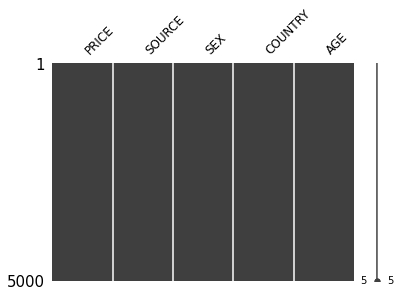

In [4]:
#pip install missingno
import missingno as msno

msno.matrix(df,figsize=(6,4),fontsize=12);

##different ways
#sns.heatmap(df.isnull(),cmap='PuBu')
#df.isna().sum()

##different ways
#print(dataframe.isnull().sum())

Contains no missing data

<hr style="border: px solid black; width: 50%; margin-left: 0;">


Eksik veri içermemektedir.

.

 Variable Analysis

Observations: 5000
Variables: 5
cat_cols: 4
num_cols: 1
cat_but_car: 0
num_but_cat: 1
Categorical Variables: ['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

Numeric Variables: ['AGE']

Cardinal Variables Appearing Categorically: []

Categorical Variables with Numeric Display: ['PRICE']
         SOURCE  Ratio
android    2974  59.48
ios        2026  40.52
##########################################


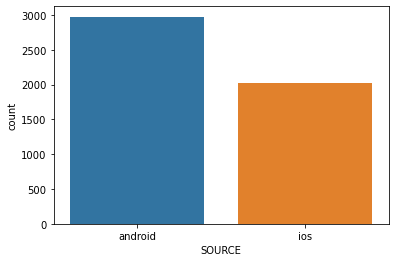

         SEX  Ratio
female  2621  52.42
male    2379  47.58
##########################################


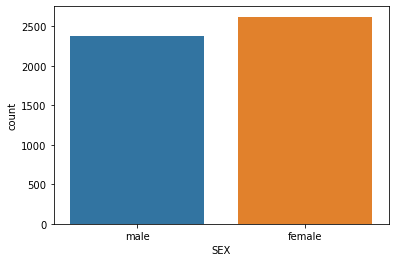

     COUNTRY  Ratio
usa     2065  41.30
bra     1496  29.92
deu      455   9.10
tur      451   9.02
fra      303   6.06
can      230   4.60
##########################################


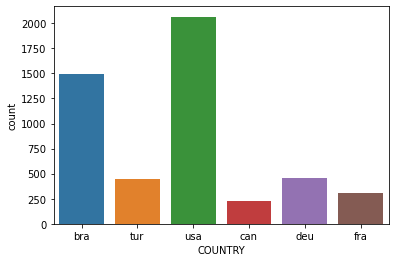

    PRICE  Ratio
29   1305  26.10
39   1260  25.20
49   1031  20.62
19    992  19.84
59    212   4.24
9     200   4.00
##########################################


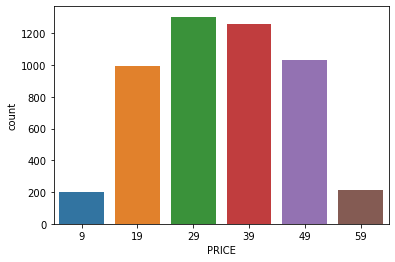

count    5000.000000
mean       23.581400
std         8.995908
min        15.000000
1%         15.000000
5%         15.000000
10%        15.000000
25%        17.000000
50%        21.000000
75%        27.000000
90%        36.000000
95%        43.000000
99%        53.000000
max        66.000000
Name: AGE, dtype: float64


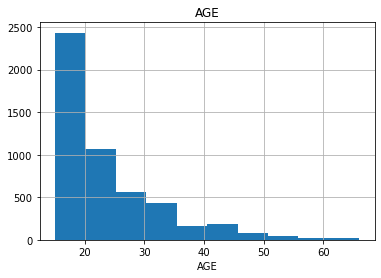

In [5]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes in ["int64", "float64"]]

    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > car_th and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    print("Categorical Variables:",cat_cols)
    print("\nNumeric Variables:",num_cols)
    print("\nCardinal Variables Appearing Categorically:",cat_but_car)   
    print("\nCategorical Variables with Numeric Display:",num_but_cat)
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


for col in num_cols:
    num_summary(df, col, plot=True)

<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 2__</u></span>


In [6]:
df["SOURCE"].unique()

array(['android', 'ios'], dtype=object)

In [7]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 3__</u></span>


In [8]:
df["PRICE"].nunique()

6

<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 4__</u></span>


In [9]:
df.groupby("PRICE")["PRICE"].count()
#df.PRICE.value_counts()

PRICE
9      200
19     992
29    1305
39    1260
49    1031
59     212
Name: PRICE, dtype: int64

<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 5__</u></span>


In [10]:
df.groupby("COUNTRY")["PRICE"].count()
#df.COUNTRY.value_counts()

COUNTRY
bra    1496
can     230
deu     455
fra     303
tur     451
usa    2065
Name: PRICE, dtype: int64

<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 6__</u></span>


In [11]:
#df.groupby("COUNTRY")["PRICE"].sum()
df.groupby("COUNTRY").agg({"PRICE": "sum"})

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 7__</u></span>


In [12]:
df.groupby("SOURCE").agg({"PRICE": "count"})
#df.SOURCE.value_counts()

,PRICE
SOURCE,
android,2974
ios,2026


<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 8__</u></span>


In [13]:
df.groupby("COUNTRY").agg({"PRICE": "mean"})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 9__</u></span>


In [14]:
df.groupby("SOURCE").agg({"PRICE": "mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


<span style="color:#1E90FF ;"><u>__TASKS 1 QUESTİON 10__</u></span>


In [15]:
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE": "mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

# Tasks 2

What are the average earnings in the breakdown of COUNTRY, SOURCE, SEX, AGE?

In [16]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE": "mean"}).head()

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897

# Tasks 3

Sort the output according to PRICE.

To better see the output in the previous question, apply the sort_values method in descending order of PRICE.

Save the output as agg_df.

In [17]:
agg_df = df.groupby(by=["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


# Task 4:

Convert the names in the index to variable names.

In [18]:
agg_df = agg_df.reset_index()
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


# Task 5

Convert age variable to categorical variable and add it to agg_df.

• Convert the numeric variable age to a categorical variable.

• Construct the intervals convincingly.

• For example: '0_18', '19_23', '24_30', '31_40', '41_70

In [19]:
bins = [0, 18, 23, 30, 40, agg_df["AGE"].max()]

mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())]

agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


# Task 6

• Define new level-based customers (personas) and add them as variables to the dataset.

• Name of the new variable to be added: customers_level_based
    
• You need to create the customers_level_based variable by combining the observations from the output from the previous question.

In [20]:
agg_df["customers_level_based"] = [row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based
0,bra,android,male,46,59.0,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [21]:
agg_df = agg_df[["customers_level_based", "PRICE"]]
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_MALE_41_66,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0


# Task 7

• Divide new customers (Example: USA_ANDROID_MALE_0_18) into 4 segments according to PRICE.

• Add the segments to agg_df as a variable with the SEGMENT naming.

• Describe segments (group by segments and get price mean, max, sum).

In [22]:
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})
agg_df = agg_df.reset_index()
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


In [23]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])
agg_df.head()

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_66,36.737179,A


In [24]:
agg_df.groupby("SEGMENT").agg({"PRICE": ["mean","min","max","sum"]})

PRICE                                   
              mean        min        max          sum
SEGMENT                                              
D        29.206780  19.000000  32.333333   817.789833
C        33.509674  32.500000  34.077340   904.761209
B        34.999645  34.103727  36.000000   944.990411
A        38.691234  36.060606  45.428571  1044.663328

In [25]:
agg_df.head()

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_66,36.737179,A


# Task 8

Categorize new customers and estimate how much revenue they can generate.

• What segment does a 33-year-old Turkish woman using ANDROID belong to and how much income is expected to earn on average?

In [26]:
agg_df[agg_df["customers_level_based"] == "TUR_ANDROID_FEMALE_31_40"]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


What segment does a 35-year-old French woman using IOS belong to and how much income is expected to earn on average?

In [27]:
agg_df[agg_df["customers_level_based"] == "FRA_IOS_FEMALE_31_40"]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
